In [1]:
import torch
print(torch.__version__)
torch.cuda.is_available()

2.4.1+cu121


True

In [2]:
!nvidia-smi

Sat Dec 14 15:19:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080        On  |   00000000:98:00.0 Off |                  N/A |
| 50%   43C    P2            187W /  320W |    1204MiB /  20480MiB |     54%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
for i in range(1,200):
    if 55760%i == 0:
        print(i)

In [3]:
import torch
t = torch.Tensor([[1,2,3],[2,3,4]])
t.new_zeros(1)

tensor([0.])

In [ ]:
# 查看h5文件结构
import h5py
data_hp = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')

def print_structure(obj1, obj2, obj3):
    if isinstance(obj1, h5py.Group):
        for k1, k2, k3 in zip(obj1.keys(), obj2.keys(), obj3.keys()):
            print(obj1[k1].name, ":\t", obj1[k1])
            print(obj2[k2].name, ":\t", obj2[k2])
            print(obj3[k3].name, ":\t", obj3[k3])
            print_structure(obj1[k1], obj2[k2], obj3[k3])
            # if isinstance(obj1[k1], h5py.Dataset):
            #     name_split = k1.split(")")
            #     name2 = name_split[0]+")"+name_split[1]
            #     if name2 not in _:
            #         _[name2] = 1
            #     else:
            #         _[name2] += 1      

_ = dict()
print_structure(data["data"], data["position"], data_hp)
print(_)

In [ ]:
name = list(data["data"].keys())[0]
print(data["data"][name][:])

In [7]:
import torch
path = "results/MateModel_Stru/ckpt.pth"
checkpoint = torch.load(path, weights_only=False) # ckpt: checkpoint
checkpoint['acc'] = [0]
torch.save(checkpoint, path)

In [ ]:
import h5py
# data_hp = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')

data = data["data"]
num_samples = 0
index_list = []
for k in data.keys():
    net_type = k.split(")")[0]
    input_size = k.split(")")[1]
    index = k.split(")")[2]
    if net_type == "custom_net" and input_size == "224":
        index_list.append(int(index))
index_list.sort()
print(len(index_list))
print(index_list)

In [13]:
import h5py
import numpy as np
hp_h5 = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data_h5 = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')
prefix = "custom_net)224)"
data = np.zeros(10)
pos = np.zeros(10)
hp = np.zeros(10)
for i in range(10):
    index = prefix + str(i + 1)
    data[i] = data_h5["data"][index][:]
    pos[i] = data_h5["position"][index][:]
    hp[i] = hp_h5[index][:]
print(hp)

ValueError: setting an array element with a sequence.

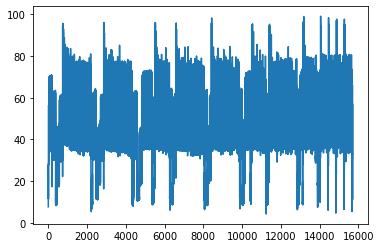

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

hp_h5 = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data_h5 = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')
net_name = "custom_net)"
i = "1000"
channel = 1
index1 = net_name + "224)" + i
index2 = net_name + "331)" + i
sample1 = data_h5["data"][index1][:]
sample2 = data_h5["data"][index2][:]
plt.plot(np.arange(len(sample1[:,channel])), sample1[:,channel])
# plt.plot(np.arange(len(sample2[:,channel])), sample2[:,channel])


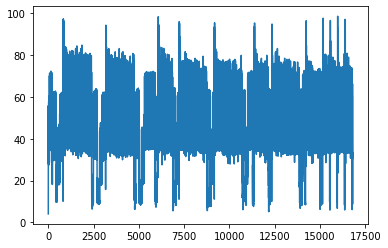

In [23]:
plt.plot(np.arange(len(sample2[:,channel])), sample2[:,channel])

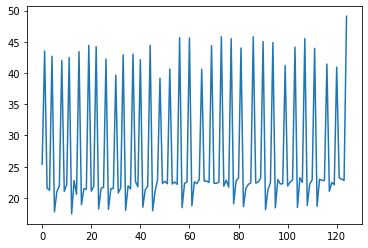

In [25]:
segment = 5
position1 = data_h5["position"][index1][segment,:]
position2 = data_h5["position"][index2][segment,:]
sample1_segment = sample1[position1[0]:position1[1], channel]
sample2_segment = sample2[position2[0]:position2[1], channel]
plt.plot(np.arange(len(sample1_segment)), sample1_segment)


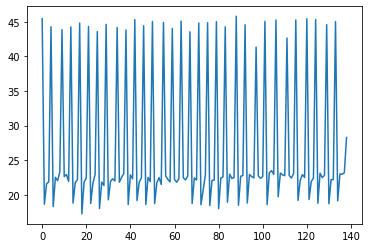

In [26]:
plt.plot(np.arange(len(sample2_segment)), sample2_segment)


In [27]:
print("1:", sum(sample1_segment>35))
print("2:", sum(sample2_segment>35))

1: 32
2: 32


In [3]:
import h5py
label_name = {0: 'conv2d', 1: 'batch_norm', 2: 'relu_', 3: 'max_pool2d', 
 4: 'adaptive_avg_pool2d', 5: 'linear', 6: 'add_', 7: '_'}
hp_name = ['in_channels', 'out_channels', 'kernel_size',
                      'stride', 'padding', 'dilation',
                      'groups', 'input_size', 'output_size']
hp_h5 = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data_h5 = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')
index = "custom_net)224)1489"
x = data_h5["data"][index][:, :-1]
y = data_h5["data"][index][:, -1]
z = data_h5["position"][index][:]
hp = hp_h5[index][:]
layer_index = [y[i[0]] for i in z]
print(layer_index)
layer_name = [label_name[y[i[0]]] for i in z]
print(layer_name)
layer_withhp = ["conv2d", "max_pool2d", "linear"]
layer_name = [i for i in layer_name if i in layer_withhp]
print(layer_name)
print(hp_name)
print(hp)

[0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0]
['conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_', 'conv2d', 'relu_']
['conv2d', 'conv2d', 'conv2d', 'conv2d', 'conv2d', 'conv2d', 'conv2d', 'conv2d']
['in_channels', 'out_channels', 'kernel_size', 'stride', 'padding', 'dilation', 'groups', 'input_size', 'output_size']
[[   3   64    3    2    1    1    1  224  112]
 [  64  128    3    1    1    1    1  112  112]
 [ 128  128    3    1    1    1    1  112  112]
 [ 128  128    3    2    1    1    1  112   56]
 [ 128  256    3    1    1    1    1   56   56]
 [ 256  256    3    1    1    1    1   56   56]
 [ 256  256    3    2    1    1    1   56   28]
 [ 256  512    3    2    1    1    1   28   14]
 [ 512 1000   -1   -1   -1   -1   -1   -1   -1]]


In [ ]:
import torch 
import os
fold = "/root/DeepTheft/backup/Step2_all"
for file in os.listdir(fold):
    print("\n\n" + file)
    checkpoint = torch.load(fold +"/"+ file)
    for k in checkpoint.keys():
        if k != "net" and k != "test_index":
            print(k + " : " + str(checkpoint[k]))

In [30]:
import torch 
import os
file = "/root/DeepTheft/backup/Step2_224/kernel_size_ckpt.pth"
checkpoint = torch.load(file)
checkpoint["acc"] = [0]
torch.save(checkpoint, file)

/tmp/ipykernel_3144/1909255551.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file)


In [8]:
import torch.nn.functional as F
import torch
t = torch.tensor([1,2,8,9])
F.one_hot(t)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
import h5py
label_name = {0: 'conv2d', 1: 'batch_norm', 2: 'relu_', 3: 'max_pool2d', 
 4: 'adaptive_avg_pool2d', 5: 'linear', 6: 'add_', 7: '_'}

hp_h5 = h5py.File(r'/root/autodl-tmp/dataset/hp.h5', 'r')
data_h5 = h5py.File(r'/root/autodl-tmp/dataset/data.h5', 'r')

length = dict()
x_y = data_h5["data"]
z = data_h5["position"]
for k in x_y.keys():
    if k.split(")")[1] == "224":
        if k.split(")")[2]=="2500":
            print(k.split(")")[-1])
        for begin_end in z[k]:
            if label_name[x_y[k][:,-1][begin_end[0]]] == "linear":
                len = begin_end[1] - begin_end[0]
                if len in length:
                    length[len] += 1
                else:
                    length[len] = 1
                

In [25]:
print(length)
print(length.keys())
print(max(list(length.keys())))
print(sum([length[i] for i in range(3)]))
print(sum([length[i] for i in length.keys() ]))

{0: 8018, 1: 6, 2: 2578, 3: 331, 5: 2, 4: 185, 99: 78, 16: 247, 95: 12, 17: 133, 97: 107, 100: 54, 102: 31, 101: 32, 103: 10, 96: 71, 87: 5, 98: 104, 18: 44, 15: 84, 19: 1, 85: 1, 89: 1, 104: 1, 105: 1, 86: 2, 9: 1, 90: 1, 88: 1, 13: 1}
dict_keys([0, 1, 2, 3, 5, 4, 99, 16, 95, 17, 97, 100, 102, 101, 103, 96, 87, 98, 18, 15, 19, 85, 89, 104, 105, 86, 9, 90, 88, 13])
105
10602
12143
